In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader, Dataset, SVD
from surprise.model_selection import KFold
from surprise.model_selection.validation import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import time
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale


In [7]:
# Reading ratings file
movies = pd.read_csv('/Users/eeshnaugraiya/Downloads/ml-100k/u.item', sep='|', encoding='latin-1', header=None)

# Select the desired columns by index
selected_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# Assign the selected columns to the DataFrame and set column names
movies = movies.iloc[:, selected_columns]

# Set column names
movies.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                  'unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
                  'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                  'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
                  'Sci-Fi', 'Thriller', 'War', 'Western']

# Now you have the desired columns in the 'movies' DataFrame



# Reading users file
# Reading ratings file
users = pd.read_csv('/Users/eeshnaugraiya/Downloads/ml-100k/u.user', sep='|', encoding='latin-1', header=None)
selected_columns = [0, 1, 2, 3, 4]

# Assign the selected columns to the DataFrame and set column names
users = users.iloc[:, selected_columns]

# Set column names
users.columns = ['user_id', 'age', 'gender', 'occupation' , 'zip_code']


# Reading ratings file

ratings = pd.read_csv('/Users/eeshnaugraiya/Downloads/ml-100k/u.data', sep='\t', encoding='latin-1', header=None)
selected_columns = [0, 1, 2, 3]

ratings = ratings.iloc[:, selected_columns]

# Set column names
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [122]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [123]:
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [124]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [125]:
# Fill missing values in the 'movie_title' column with empty strings
movies['movie_title'] = movies['movie_title'].fillna('')

# Display the first few rows of the 'movie_title' column after filling missing values
print(movies['movie_title'].head())



0     Toy Story (1995)
1     GoldenEye (1995)
2    Four Rooms (1995)
3    Get Shorty (1995)
4       Copycat (1995)
Name: movie_title, dtype: object


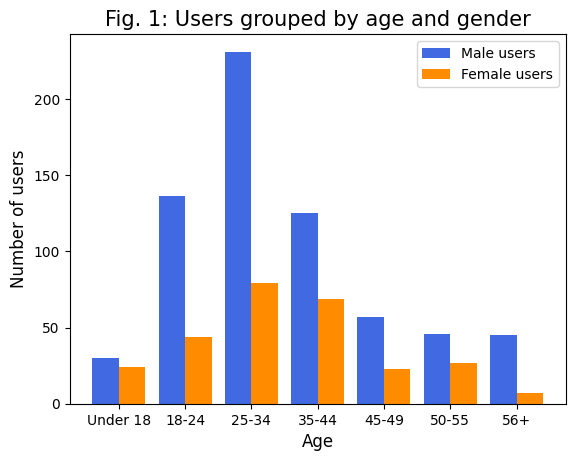

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have DataFrames named ratings_df, users_df, and movies_df

# Extract user age and gender data from users_df
user_age_gender_data = users[['gender', 'age']]

# Separate users into female and male groups and sort them by age
female_user_ages = user_age_gender_data[user_age_gender_data['gender'] == 'F'].sort_values('age')
male_user_ages = user_age_gender_data[user_age_gender_data['gender'] == 'M'].sort_values('age')

# Function to get the count of users within an age range
def get_group_count(min_age, max_age, dataset):
    age_group = dataset.apply(lambda x: True if min_age <= x['age'] <= max_age else False, axis=1)
    count = len(age_group[age_group == True].index)
    return count

# Calculate the counts of users in different age groups for both genders
G1_male = get_group_count(0, 18, male_user_ages)
G2_male = get_group_count(19, 24, male_user_ages)
G3_male = get_group_count(25, 34, male_user_ages)
G4_male = get_group_count(35, 44, male_user_ages)
G5_male = get_group_count(45, 49, male_user_ages)
G6_male = get_group_count(50, 55, male_user_ages)
G7_male = get_group_count(56, 200, male_user_ages)

G1_female = get_group_count(0, 18, female_user_ages)
G2_female = get_group_count(19, 24, female_user_ages)
G3_female = get_group_count(25, 34, female_user_ages)
G4_female = get_group_count(35, 44, female_user_ages)
G5_female = get_group_count(45, 49, female_user_ages)
G6_female = get_group_count(50, 55, female_user_ages)
G7_female = get_group_count(56, 200, female_user_ages)

# Figure 1: Visualizing the userbase by plotting age and gender to a bar chart
labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
men_grouped = [G1_male, G2_male, G3_male, G4_male, G5_male, G6_male, G7_male]
women_grouped = [G1_female, G2_female, G3_female, G4_female, G5_female, G6_female, G7_female]
x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig1, ax1 = plt.subplots()
rects1 = ax1.bar(x - width/2, men_grouped, width, label='Male users', color='royalblue')
rects2 = ax1.bar(x + width/2, women_grouped, width, label='Female users', color='darkorange')

# Setting the labels for the bar chart
ax1.set_ylabel('Number of users', size=12)
ax1.set_xlabel('Age', size=12)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('Fig. 1: Users grouped by age and gender', size=15)
ax1.legend()

plt.show()


In [169]:
import pandas as pd

# Assuming you already have the 'movies' and 'ratings' DataFrames

# Extract genre columns from the 'movies' DataFrame
genres = ['Action', 'Adventure', 'Animation', "Childrens", 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Merge 'ratings' and 'movies' DataFrames on 'movie_id' or 'FilmID'
merged = pd.merge(ratings, movies, left_on='movie_id', right_on='movie_id')

# Select relevant columns
movie_ratings = merged[['movie_id', 'user_id', 'rating'] + genres]

# Define rating scale
rating_scale = [1, 2, 3, 4, 5]

# Initialize a list to store genre rating counts
genres_rating_count = []

# Calculate rating counts for each genre and rating scale value
for genre in genres:
    for rating in rating_scale:
        genre_list = movie_ratings.loc[(movie_ratings[genre] == 1) & (movie_ratings['rating'] == rating)]
        genre_rated_count = len(genre_list)
        genres_rating_count.append([genre, rating, genre_rated_count])

# Function for extracting the count of a specific rating of all genres
def get_rating_count(score):
    rating_count = []
    for count in genres_rating_count:
        if count[1] == score:
            rating_count.append(count[2])
    return rating_count

# Function for extracting the total number of ratings for all genres
def get_total_rating_count():
    all_ratings = [count[2] for count in genres_rating_count]
    totals = [sum(all_ratings[i:i+5]) for i in range(0, len(all_ratings), 5)]
    return totals

# Create a DataFrame for genre rating counts
genre_df = pd.DataFrame({'Genre': genres,
                         'Rated 1': get_rating_count(1),
                         'Rated 2': get_rating_count(2),
                         'Rated 3': get_rating_count(3),
                         'Rated 4': get_rating_count(4),
                         'Rated 5': get_rating_count(5),
                         'Total nr of ratings': get_total_rating_count()})

# Calculate the average rating
genre_df["Average rating"] = (genre_df["Rated 1"] + (genre_df["Rated 2"] * 2) + (genre_df["Rated 3"] * 3) + 
                              (genre_df["Rated 4"] * 4) + (genre_df["Rated 5"] * 5)) / genre_df['Total nr of ratings']

# Display the genre rating count DataFrame
print(genre_df)


          Genre  Rated 1  Rated 2  Rated 3  Rated 4  Rated 5  \
0        Action     1547     3254     7254     8431     5103   
1     Adventure      804     1709     3901     4436     2903   
2     Animation      186      373     1018     1232      796   
3     Childrens      574      961     2218     2212     1217   
4        Comedy     2279     3856     8751     9722     5224   
5         Crime      417      834     2006     2835     1963   
6   Documentary       59       58      164      268      209   
7         Drama     1766     3647     9877    14608     9997   
8       Fantasy      112      220      461      383      176   
9     Film-Noir       45       97      367      664      560   
10       Horror      503      814     1513     1610      877   
11      Musical      285      574     1418     1627     1050   
12      Mystery      255      526     1306     1933     1225   
13      Romance      942     2017     5061     6882     4559   
14       Sci-Fi      724     1519     32

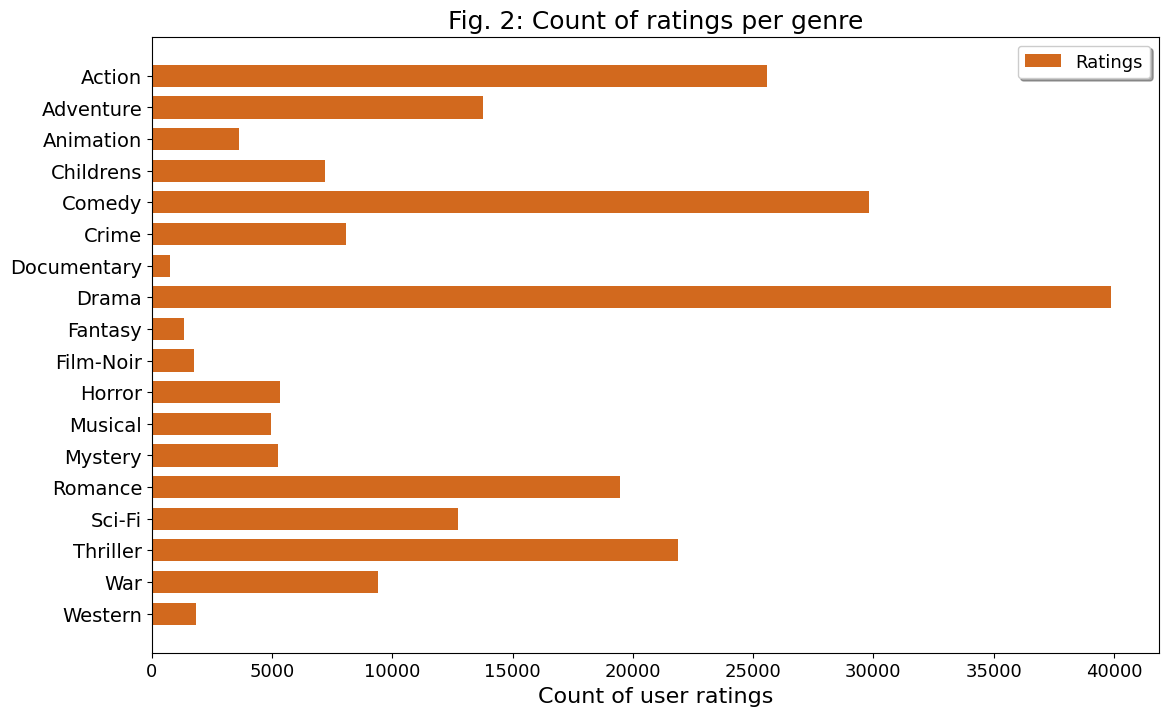

In [170]:
# Figure 2: Visualizing the number of ratings and rating scores for each genre
total_ratings = genre_df.iloc[:, 6].values.tolist()
fig2, ax2 = plt.subplots()
fig2_labels = [genre for genre in genres]
x = np.arange(len(fig2_labels))  # the label locations
width = 0.7  # the width of the bars
ax2.barh(x, total_ratings, width, label='Ratings', color='chocolate')

# Setting labels for bar chart
ax2.set_xlabel('Count of user ratings', size=16)
ax2.set_yticks(x)
ax2.set_yticklabels(fig2_labels, fontdict={'fontsize': 14})
ax2.set_title('Fig. 2: Count of ratings per genre', size=18)
ax2.invert_yaxis()  # Invert y axis so that the genres appear alphabetically
ax2.legend(shadow=0.4, prop={"size": 13})
plt.xticks(fontsize=13)

# Adjusting and displaying the graph
fig2.set_figheight(8)
fig2.set_figwidth(13)
plt.show()

/var/folders/wn/28xgtwmj751dk2ks6jz_6d840000gn/T/ipykernel_38373/2546452029.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(fig3_xlabels, fontdict={'fontsize': 15})


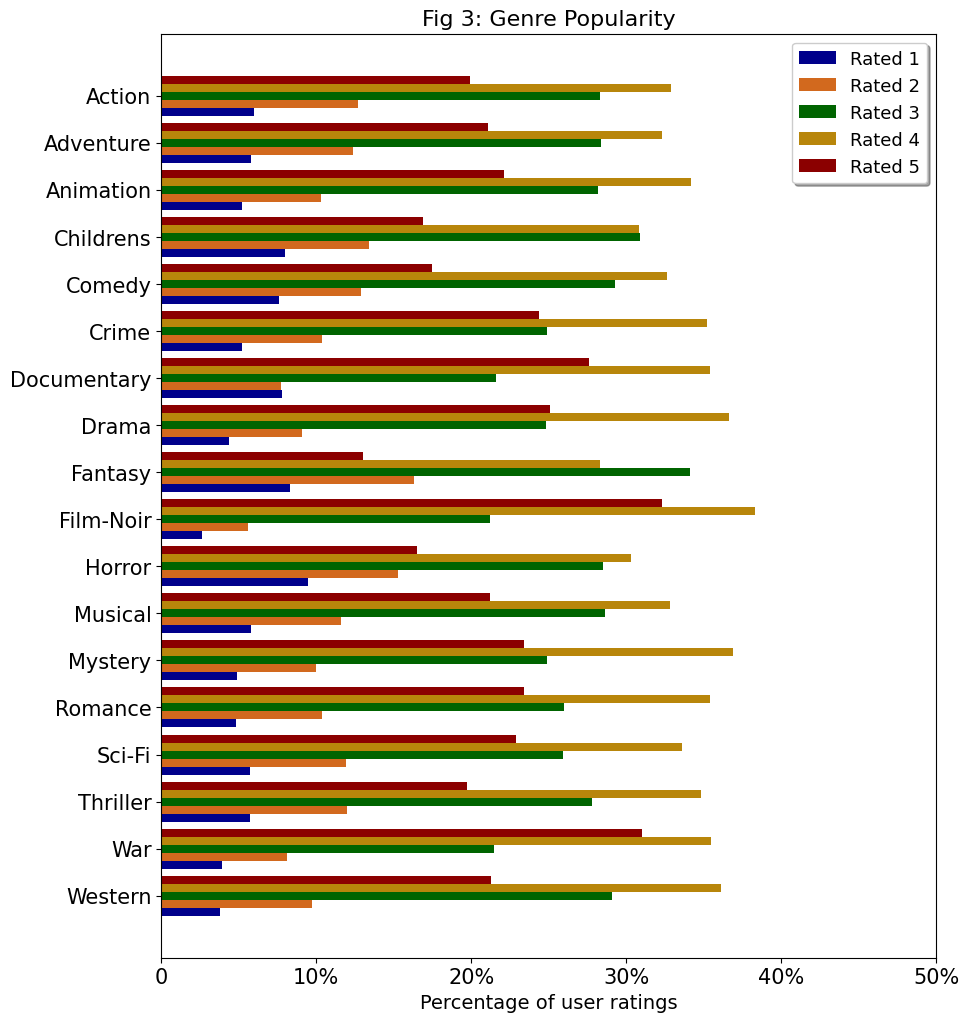

In [171]:
# Figure 3: Visualizing the ratings for each genre as a proportion of the total number of movies in that genre
# function for extracting the count of a specific rating of all genres
def get_rating_percentages(score):
    rated_count = genre_df.iloc[:, score].values.tolist()
    rating_percentages = []
    i = 0

    for total in total_ratings:
        percentage = (100 / total) * rated_count[i]
        i += 1
        rating_percentages.append(round(percentage, 1))

    return rating_percentages


genre_rating_percentage_data = {'Genre': [genre for genre in genres], 'Rated 1': get_rating_percentages(1),
                                'Rated 2': get_rating_percentages(2), 'Rated 3': get_rating_percentages(3),
                                'Rated 4': get_rating_percentages(4), 'Rated 5': get_rating_percentages(5),
                                'Total nr of ratings': get_total_rating_count()}
genre_rating_percent_df = pd.DataFrame(genre_rating_percentage_data)

rated_1_percentage = genre_rating_percent_df.iloc[:, 1].values.tolist()
rated_2_percentage = genre_rating_percent_df.iloc[:, 2].values.tolist()
rated_3_percentage = genre_rating_percent_df.iloc[:, 3].values.tolist()
rated_4_percentage = genre_rating_percent_df.iloc[:, 4].values.tolist()
rated_5_percentage = genre_rating_percent_df.iloc[:, 5].values.tolist()

fig3, ax3 = plt.subplots()
fig3_ylabels = [genre for genre in genres]
fig3_xlabels = ['0', '10%', '20%', '30%', '40%', '50%']
x = np.arange(len(fig3_ylabels))  # the label locations
width = 0.17  # the width of the bars

ax3.barh(x + width*2, rated_1_percentage, width, label='Rated 1', color='darkblue')
ax3.barh(x + width, rated_2_percentage, width, label='Rated 2', color='chocolate')
ax3.barh(x, rated_3_percentage, width, label='Rated 3', color='darkgreen')
ax3.barh(x - width, rated_4_percentage, width, label='Rated 4', color='darkgoldenrod')
ax3.barh(x - width*2, rated_5_percentage, width, label='Rated 5', color='darkred')

# Setting labels for bar chart
ax3.set_xlabel('Percentage of user ratings', size=14)
ax3.set_xticklabels(fig3_xlabels, fontdict={'fontsize': 15})
ax3.set_xlim(right=50)
ax3.set_yticks(x)
ax3.set_yticklabels(fig3_ylabels, fontdict={'fontsize': 15})
ax3.set_title('Fig 3: Genre Popularity', size=16)
ax3.invert_yaxis()  # Invert y axis so that the genres appear alphabetically
ax3.legend(shadow=0.4, prop={"size": 13})

# Adjusting and displaying the graph
fig3.set_figheight(12)
fig3.set_figwidth(10)
plt.show()


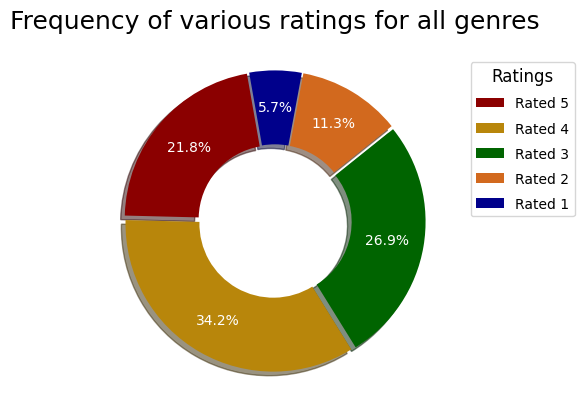

In [172]:
# Figure 4: Visualizing the proportional frequency of different rating scores for all genres
def get_rating_percentage_total(score):
    rated_count = genre_df.iloc[:, score].values.tolist()
    total_ratings_count = 0
    sum_ratings = 0

    for count in rated_count:
        sum_ratings += count

    for total in total_ratings:
        total_ratings_count += total

    return round((sum_ratings / total_ratings_count) * 100, 1)


ratings_data = [get_rating_percentage_total(5), get_rating_percentage_total(4), get_rating_percentage_total(3),
                get_rating_percentage_total(2), get_rating_percentage_total(1)]

# Plotting a pie (donut) chart for case distribution visualization
labels = ["Rated 5", "Rated 4", "Rated 3", "Rated 2", "Rated 1"]
fig4, ax4 = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts, autotext = ax4.pie(ratings_data, autopct='%1.1f%%', pctdistance=0.75, shadow=True,
                                  wedgeprops=dict(width=0.5), startangle=100, textprops=dict(color="w"),
                                  explode=(0.02, 0.02, 0.02, 0.02, 0.02), colors=['darkred', 'darkgoldenrod',
                                                                                  'darkgreen', 'chocolate', 'darkblue'])

ax4.legend(wedges, labels, loc="upper right", bbox_to_anchor=(1.0, 0.05, 0.33, 0.9), title='Ratings',
           title_fontsize='12', labelspacing=0.8)
ax4.set_title("Frequency of various ratings for all genres", size=18)

plt.show()

           rating
user_id          
1        3.610294
2        3.709677
3        2.796296
4        4.333333
5        2.874286


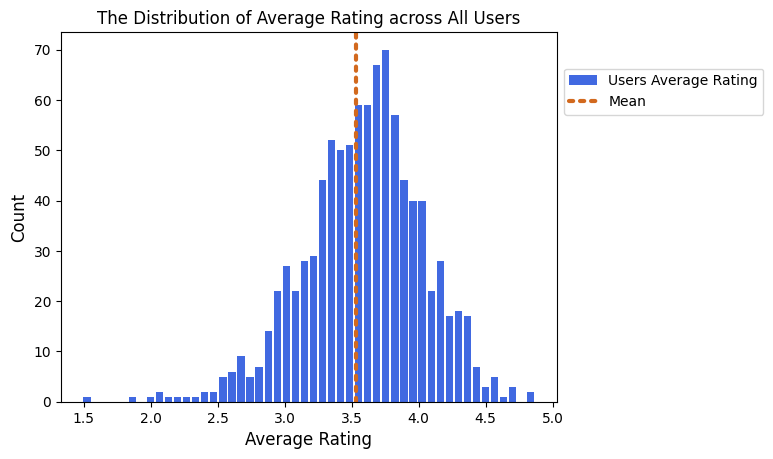

In [174]:
# Figure 5: Visualizing the distribution of average ratings for all users
users_avg_rating = pd.DataFrame(ratings.groupby('user_id')['rating'].mean())
print(users_avg_rating.head())

# Plotting a histogram over the average rating for all users
users_avg_rating = users_avg_rating['rating']
fig5, ax5 = plt.subplots()
n, bins, patches = ax5.hist(users_avg_rating, label='Users Average Rating',
                            stacked=True, color='royalblue', bins=50, rwidth=0.8)
# Set labels for histogram
ax5.set_xlabel('Average Rating', size=12)
ax5.set_ylabel('Count', size=12)
ax5.set_title('The Distribution of Average Rating across All Users', size=12)

# Add a line indicating the mean rating for all users
plt.axvline(ratings["rating"].mean(), color='chocolate', linestyle='dotted', dash_capstyle="round",
            linewidth=3, label="Mean")
ax5.legend(bbox_to_anchor=(1, 0.92))

plt.show()

In [11]:
# Splitting the ratings dataset into the feature set (X) and target labels (y)
X = ratings.drop(columns='rating')
y = ratings["rating"].values  # The movie ratings are the target variables we want to predict

# Preparing train, validation and test datasets.
# I have chosen a split ratio of 70%, 15%, 15%, because I want a somewhat large training set at the cost of a
# smaller validation and test set. I do not think that a smaller validation (or test) dataset will negatively
# impact the generalization ability of the chosen models, because I am only using rather simple ML models
# with few hyperparamaters.
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=101)

# Creating a complete training dataset with X_train and y_train
train_df = X_train.copy()
train_df["rating"] = y_train

train_df

,user_id,movie_id,timestamp,rating
64304,885,866,885713102,3
78145,104,222,888465319,3
19755,82,174,878769478,5
78591,450,597,882473914,4
42070,373,1066,877106233,4
...,...,...,...,...
5695,94,385,891721975,2
73542,537,39,886031407,2
83281,399,1,882340657,4
83467,303,631,879483617,4


In [12]:
# Creating a new DataFrame with the average rating for each movie
baseline_y_pred = train_df.groupby('movie_id')['rating'].mean().reset_index()
baseline_y_pred.columns = ['movie_id', 'Predicted rating']

# Calculate the overall average rating for all movies in the training dataset
overall_average_rating = train_df['rating'].mean()

# Find movies with no ratings in the training dataset
unrated_movies = set(movies['movie_id']) - set(train_df['movie_id'])

# Create predictions for unrated movies with the overall average rating
unrated_predictions = pd.DataFrame({'movie_id': list(unrated_movies), 'Predicted rating': overall_average_rating})

# Concatenate the rated movie predictions and unrated movie predictions
baseline_y_pred = pd.concat([baseline_y_pred, unrated_predictions])

# Creating a DataFrame for the validation data (y_true) to calculate RMSE of the baseline model
val_movies_dict = {'movie_id': X_val['movie_id'], 'Actual rating': y_val}
val_movies_df = pd.DataFrame(val_movies_dict)

# Merging the training and validation datasets on the movie ID
y_pred_and_y_true = pd.merge(baseline_y_pred, val_movies_df, on='movie_id')
baseline_y_pred_vs_y_true = y_pred_and_y_true.rename(columns={'rating': 'Predicted rating'})

# Calculate RMSE for the baseline model
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_baseline = np.sqrt(mean_squared_error(baseline_y_pred_vs_y_true['Predicted rating'], baseline_y_pred_vs_y_true['Actual rating']))
print("RMSE baseline model:", rmse_baseline)


RMSE baseline model: 1.0297327394500146


In [13]:
# Create a new dataframe with the average rating for each movie
baseline_y_pred = train_df.groupby('movie_id')['rating'].mean().reset_index()
baseline_y_pred.rename(columns={'rating': 'Predicted rating'}, inplace=True)

# Identify movies with no ratings in the training dataset
all_movies = movies['movie_id'].unique()
rated_movies = baseline_y_pred['movie_id'].unique()
unrated_movies = list(set(all_movies) - set(rated_movies))

# Add unrated movies to the baseline predictions with the overall average rating
average_rating = train_df['rating'].mean()
unrated_predictions = pd.DataFrame({'movie_id': unrated_movies, 'Predicted rating': average_rating})
baseline_y_pred = pd.concat([baseline_y_pred, unrated_predictions])

# Create a dataframe for the validation data (y_true) to calculate RMSE of the baseline model
val_movies_dict = {'movie_id': X_val["movie_id"], 'Actual rating': y_val}
val_movies_df = pd.DataFrame(val_movies_dict)

# Merge the training and validation datasets on the movie ID
y_pred_and_y_true = pd.merge(baseline_y_pred, val_movies_df, on='movie_id')
baseline_y_pred_vs_y_true = y_pred_and_y_true.rename(columns={"Predicted rating": "Predicted rating"})

baseline_y_pred_vs_y_true


,movie_id,Predicted rating,Actual rating
0,1,3.869969,4
1,1,3.869969,4
2,1,3.869969,5
3,1,3.869969,4
4,1,3.869969,4
...,...,...,...
14995,1651,3.533471,4
14996,1653,3.533471,5
14997,1654,3.533471,1
14998,1529,3.533471,3


In [14]:
# calculating RMSE for the baseline model
print("RMSE baseline model: ", sqrt(mean_squared_error(baseline_y_pred_vs_y_true["Predicted rating"], 
                                                       baseline_y_pred_vs_y_true["Actual rating"])))

RMSE baseline model:  1.0297327394500146


In [15]:
# ----------- PREPARING TRAINING DATA ----------- #
# Adding the movie features (genre, release year) to the training dataset
content_train_df = pd.merge(train_df, movies, on='movie_id')
content_train_df.drop(columns=['timestamp', 'movie_id', 'movie_title'], inplace=True)  # Remove useless features

content_train_df

,user_id,rating,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,885,3,25-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Michael%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,936,2,25-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Michael%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,102,2,25-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Michael%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,87,4,25-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Michael%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,378,2,25-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Michael%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,587,4,22-Apr-1997,NaN,http://us.imdb.com/M/title-exact?Nightwatch%20...,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
69996,405,1,04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?For+Ever+Moza...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,405,1,01-Jan-1988,NaN,http://us.imdb.com/Title?B%E2ton+rouge+(1988),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69998,782,2,02-May-1997,NaN,http://us.imdb.com/M/title-exact?Ripe%20%28199...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Creating a list of lists with the target attribute (movie ratings), grouped by userID
y_grouped_by_user = content_train_df.groupby(["user_id"])
y_train_listed = []

for i, j in y_grouped_by_user:
    y_train_listed.append(j["rating"].values)  # Extract target feature (ratings) from sorted data
    
# Target attributes for the first user
y_train_listed[0]

array([4, 4, 5, 3, 5, 4, 4, 5, 5, 4, 4, 4, 1, 4, 3, 5, 3, 5, 5, 4, 5, 5,
       4, 3, 5, 5, 4, 5, 4, 4, 5, 4, 2, 2, 2, 2, 4, 1, 5, 2, 5, 2, 2, 4,
       4, 3, 5, 3, 3, 5, 3, 3, 4, 4, 5, 4, 5, 4, 3, 2, 5, 1, 5, 3, 3, 1,
       3, 4, 4, 2, 4, 5, 1, 5, 4, 3, 1, 4, 1, 5, 4, 3, 3, 3, 3, 5, 4, 3,
       4, 4, 4, 4, 4, 3, 2, 1, 4, 3, 5, 5, 4, 3, 1, 4, 3, 4, 2, 5, 3, 1,
       3, 4, 5, 5, 4, 2, 1, 3, 5, 1, 3, 3, 4, 2, 5, 5, 4, 3, 5, 4, 3, 5,
       4, 5, 4, 5, 3, 4, 5, 4, 2, 3, 5, 5, 3, 1, 3, 5, 3, 4, 5, 1, 2, 5,
       4, 1, 5, 4, 3, 4, 3, 4, 2, 4, 5, 5, 3, 2, 4, 4, 5, 4, 1, 1, 1, 4,
       1, 4, 4, 1, 2, 4, 4])

In [17]:
# Creating a list of dataframes with the feature set (movie info about genres and release year), grouped by userID
content_train_df.drop(columns='rating', inplace=True)
x_grouped_by_user = content_train_df.groupby(["user_id"])
x_train_listed = []

for user_id, group in x_grouped_by_user:
    x_train_listed.append(group.drop(columns='user_id'))
    
# The feature set for the first user
x_train_listed[0]

,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
131,22-Nov-1996,NaN,http://us.imdb.com/M/title-exact?Star%20Trek:%...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000,01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?Gone%20with%2...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1241,01-Jan-1984,NaN,http://us.imdb.com/M/title-exact?Amadeus%20(1984),0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1459,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Forrest%20Gum...,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1611,01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68709,NaN,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68933,04-Oct-1996,NaN,http://us.imdb.com/M/title-exact?D3:%20The%20M...,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
69108,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Nadja%20(1994),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69335,30-Oct-1996,NaN,http://us.imdb.com/M/title-exact?Unhook%20the%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
all_movies = movies.drop(columns=['movie_title', 'movie_id'])
all_movies

,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Creating a 2-dimensional matrix for the validation data to calculate RMSE.

# Listing the user IDs in the same order as in the grouped dataframes
user_ids = list(x_grouped_by_user.groups.keys())

# Listing the movie IDs in the same order as in the movies dataset
movie_ids = movies["movie_id"].values

# Creating the matrix. Axis 1: User IDs, Axis 2: Movie IDs. Elements: True ratings from validation data
df_val = X_val.copy()
df_val["rating"] = y_val
validation_matrix = pd.DataFrame(index=user_ids, columns=movie_ids)  # Starting with an empty matrix

# Filling in the true ratings as elements
for row in df_val.itertuples(index=False):
    user = row.user_id
    movie = row.movie_id
    true_rating = row.rating
    validation_matrix.at[user, movie] = true_rating

validation_matrix


,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
print(train_df.columns)


Index(['user_id', 'movie_id', 'timestamp', 'Rangering'], dtype='object')


In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'ratings' with columns: 'user_id', 'movie_id', 'timestamp', and 'Rangering'
# 'Rangering' represents ratings

# Assigning the different machine learning algorithms to be implemented in the models (including hyperparameters) to a dictionary
ml_algorithms = {"Linear regression": LinearRegression(), "Lasso": Lasso(alpha=1.0, max_iter=10000), 
                 "KNN_7": KNeighborsRegressor(n_neighbors=7),
                 "RFR": RandomForestRegressor(n_estimators=1000, n_jobs=3, max_features="sqrt", random_state=0),
                 "SVR": SVR(C=1.0)}

# Saving lists that you later use to construct a dataframe containing the performances of the models
CBF_models_listed = []
RMSE_CBF_listed = []

# Assuming 'movie_id' is the column containing movie identifiers
# Encode 'movie_id' as numeric values using LabelEncoder
label_encoder = LabelEncoder()
ratings['movie_id'] = label_encoder.fit_transform(ratings['movie_id'])

# List of all unique movie IDs
movie_ids = ratings['movie_id'].unique()

# Create an array to represent all possible movies for prediction
all_movies = np.array(movie_ids).reshape(-1, 1)

# Create a validation matrix (you may have this already)
# This matrix represents user-movie ratings where NaN values indicate missing ratings
# Make sure it matches your dataset structure
validation_matrix = pd.DataFrame(validation_matrix)  # Replace ... with your validation data

# For every machine learning algorithm in the dictionary:
for name, ml_alg in ml_algorithms.items():
    # Create an empty list for predictions
    CBF_predictions = []

    # For each user in the training dataset:
    for user_id in ratings['user_id'].unique():
        # Filter data for the current user
        user_data = ratings[ratings['user_id'] == user_id]

        # Extract the features (e.g., movie_id) and target (Rangering) for this user
        x_train = user_data['movie_id'].values.reshape(-1, 1)
        y_train = user_data['rating'].values

        # Fit a machine learning model
        ml_alg.fit(x_train, y_train)

        # Predict ratings for all movies for this user
        prediction = ml_alg.predict(all_movies)
        prediction = np.clip(prediction, 1, 5)  # Predictions must be minimum 1, maximum 5

        # Append all the predictions to the predictions list
        CBF_predictions.append(prediction)

    # Create a dataframe with the predictions
    df_predict = pd.DataFrame(CBF_predictions, index=ratings['user_id'].unique(), columns=movie_ids)

    # Create a dataframe with only the predictions for the movies-user combinations that appear in the validation set
    num_actual = validation_matrix.to_numpy().flatten()[validation_matrix.notna().to_numpy().flatten()]
    num_predict = df_predict.to_numpy().flatten()[validation_matrix.notna().to_numpy().flatten()]

    # Calculate the RMSE for the content-based filtering model and add the result to the lists
    RMSE_CBF_listed.append(sqrt(mean_squared_error(num_predict, num_actual)))
    CBF_models_listed.append(name)

# Printing the results
RMSE_CBF_df = pd.DataFrame({"Model": CBF_models_listed, "RMSE": RMSE_CBF_listed})
print("RMSE of different content-based filtering models without the year of release feature:")
print(RMSE_CBF_df)


RMSE of different content-based filtering models without the year of release feature:
               Model      RMSE
0  Linear regression  1.246689
1              Lasso  1.245349
2              KNN_7  1.278296
3                RFR  1.425913
4                SVR  1.301111


In [51]:
# Running the best content-based filtering model so far
model = Lasso(alpha=1.0, max_iter=10000)
CBF_predictions = []

# For each user in the training dataset:
for i, j in enumerate(x_train_listed):
    model.fit(x_train_listed[i], y_train_listed[i])
    prediction = model.predict(all_movies)
    prediction = np.clip(prediction, 1, 5)
    CBF_predictions.append(prediction)

# Creating a dataframe for the predictions
CBF_model = pd.DataFrame(CBF_predictions, index=user_ids, columns=movie_ids)

ValueError: could not convert string to float: '22-Nov-1996'

In [126]:
# Check the datatype of "id" in movies_metadata.csv
pd.DataFrame({'feature':movies.dtypes.index, 'dtype':movies.dtypes.values})

,feature,dtype
0,movie_id,int64
1,movie_title,object
2,release_date,object
3,video_release_date,float64
4,IMDb_URL,object
5,unknown,int64
6,Action,int64
7,Adventure,int64
8,Animation,int64
9,Childrens,int64


In [127]:
import pandas as pd
import numpy as np

# Load your movie data
# Assuming your DataFrame is named 'movies_df'
# Replace this with your actual data loading code
#movies_df = pd.read_csv('/Users/eeshnaugraiya/Downloads/ml-100k/u.item', delimiter='|')

# Define a function to get movie recommendations based on genres
def get_genre_recommendations(movie_id, top_n=10):
    # Extract the genre columns from the DataFrame
    genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
                     'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                     'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

    # Get the genre values for the given movie
    movie_genres = movies.iloc[movie_id][genre_columns]

    # Find movies with similar genres
    similar_movies = []
    for idx, row in movies.iterrows():
        if idx == movie_id:
            continue

        # Calculate the Jaccard similarity between genres
        intersection = np.sum(movie_genres & row[genre_columns])
        union = np.sum(movie_genres | row[genre_columns])
        jaccard_similarity = intersection / union

        similar_movies.append((idx, jaccard_similarity))

    # Sort the similar movies by Jaccard similarity
    similar_movies.sort(key=lambda x: x[1], reverse=True)

    # Get the top N similar movies
    top_similar_movies = similar_movies[:top_n]

    # Get the movie titles for the top similar movies
    recommended_movie_ids = [movie[0] for movie in top_similar_movies]
    recommended_movies = movies.loc[recommended_movie_ids]['movie_title']

    return recommended_movies

# Example: Get genre-based recommendations for a movie (replace 0 with the actual movie ID)
movie_id_to_recommend_for = 1
genre_based_recommendations = get_genre_recommendations(movie_id_to_recommend_for)
print(genre_based_recommendations)


116                    Rock, The (1996)
117                      Twister (1996)
565     Clear and Present Danger (1994)
826                     Daylight (1996)
929               Chain Reaction (1996)
981                 Maximum Risk (1996)
1012                    Anaconda (1997)
1015                     Con Air (1997)
1104                   Firestorm (1998)
1313          Surviving the Game (1994)
Name: movie_title, dtype: object


In [128]:
def get_genre_recommendations(movie_title, top_n=10):
    # Extract the genre columns from the DataFrame
    genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
                     'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                     'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

    # Find the movie with the given title
    movie = movies[movies['movie_title'] == movie_title]

    if movie.empty:
        return []

    # Get the genre values for the given movie
    movie_genres = movie[genre_columns].values[0]

    # Find movies with similar genres
    similar_movies = []
    for idx, row in movies.iterrows():
        if row['movie_title'] == movie_title:
            continue

        # Calculate the Jaccard similarity between genres
        intersection = np.sum(movie_genres & row[genre_columns])
        union = np.sum(movie_genres | row[genre_columns])
        jaccard_similarity = intersection / union

        similar_movies.append((row['movie_title'], jaccard_similarity))

    # Sort the similar movies by Jaccard similarity
    similar_movies.sort(key=lambda x: x[1], reverse=True)

    # Get the top N similar movies
    top_similar_movies = similar_movies[:top_n]

    return top_similar_movies

# Example: Get genre-based recommendations for a movie title (replace with your movie title)
movie_title_to_recommend_for = 'Terminator 2: Judgment Day (1991)'
genre_based_recommendations = get_genre_recommendations(movie_title_to_recommend_for)
print(genre_based_recommendations)
for recommendation in genre_based_recommendations:
    print(recommendation[0])

[('Lawnmower Man, The (1992)', 1.0), ('Terminator, The (1984)', 1.0), ('Face/Off (1997)', 1.0), ('Johnny Mnemonic (1995)', 1.0), ('Arrival, The (1996)', 1.0), ('Lost in Space (1998)', 1.0), ('Solo (1996)', 1.0), ('Nemesis 2: Nebula (1995)', 1.0), ('Abyss, The (1989)', 0.75), ('Aliens (1986)', 0.75)]
Lawnmower Man, The (1992)
Terminator, The (1984)
Face/Off (1997)
Johnny Mnemonic (1995)
Arrival, The (1996)
Lost in Space (1998)
Solo (1996)
Nemesis 2: Nebula (1995)
Abyss, The (1989)
Aliens (1986)


In [129]:
#user based collaborative filtering

In [153]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split

# Create a Reader object for Surprise
reader = Reader(rating_scale=(1, 5))

# Load the dataset
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Create and train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Make predictions for the testset
user_predictions = svd_model.test(testset)

# Recommend top N movies for the user
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n(user_predictions, n=10)


275                              Leaving Las Vegas (1995)
339                                  Boogie Nights (1997)
407                                 Close Shave, A (1995)
426                          To Kill a Mockingbird (1962)
473     Dr. Strangelove or: How I Learned to Stop Worr...
478                                        Vertigo (1958)
516                                      Manhattan (1979)
527                            Killing Fields, The (1984)
588                                Wild Bunch, The (1969)
1239           Ghost in the Shell (Kokaku kidotai) (1995)
Name: movie_title, dtype: object


In [155]:
def hybrid_recommendations(user_id, movie_title, top_n=10, cf_weight=0.7, cb_weight=0.3):
    # Get user-based CF recommendations
    cf_recommendations = top_n_recommendations.get(user_id, [])

    # Get content-based recommendations
    cb_recommendations = get_genre_recommendations(movie_title, top_n)

    # Combine recommendations using weighted average
    hybrid_recommendations = {}
    for movie_id, cf_score in cf_recommendations:
        movie_title = movies[movies['movie_id'] == movie_id]['movie_title'].values[0]
        hybrid_recommendations[movie_title] = cf_weight * cf_score

    for movie_title, cb_score in cb_recommendations:
        if movie_title in hybrid_recommendations:
            hybrid_recommendations[movie_title] += cb_weight * cb_score
        else:
            hybrid_recommendations[movie_title] = cb_weight * cb_score

    # Sort the hybrid recommendations by score
    sorted_hybrid_recommendations = sorted(hybrid_recommendations.items(), key=lambda x: x[1], reverse=True)

    # Get the top N hybrid recommendations
    top_hybrid_recommendations = sorted_hybrid_recommendations[:top_n]

    return top_hybrid_recommendations


In [158]:
user_id_to_recommend_for = 1  # Replace with the user_id
last_movie_seen = 'Terminator 2: Judgment Day (1991)'  # Replace with the movie title

hybrid_rec = hybrid_recommendations(user_id_to_recommend_for, last_movie_seen)
for movie_title, score in hybrid_rec:
    print(movie_title)


Henry V (1989)
12 Angry Men (1957)
Return of the Jedi (1983)
Raiders of the Lost Ark (1981)
Patton (1970)
Room with a View, A (1986)
Amadeus (1984)
Star Trek: The Wrath of Khan (1982)
Army of Darkness (1993)
Bound (1996)


In [2]:
def find_total_of_min_deleted(arr):
    total = 0
    while len(arr) > 0:
        min_index = arr.index(min(arr))
        total += arr[min_index]
        
        # Check if the adjacent elements exist before removing them
        if min_index > 0:
            arr.pop(min_index - 1)
        if min_index < len(arr) - 1:
            arr.pop(min_index + 1)
        
        # Remove the minimum number itself
        arr.pop(min_index)
    return total

# Example usage:
arr = [3, 7, 2, 8, 4]
result = find_total_of_min_deleted(arr)
print("Total of minimum numbers deleted:", result)



IndexError: pop index out of range